<center><h1><strong><font color="blue">Pelatihan Asociate Data Scientist (ADS) - Module 03 Hari 02</font></strong></h1></center>

<img alt="" src="images/covers/cover_uin-aptikom-taudata.jpg"/>

# <center><font color="blue">  Variabel target (dependent) dan prediktor (independent)</font></center>

<img style="undefined: undefined;" src="images/Dependent-Independent.png" />

* **Variable Target**: adalah satu atau lebih variabel yang dipengaruhi oleh satu atau lebih variabel yang lain.
Contoh: Variabel gaji dipengaruhi oleh variabel lama kerja, pangkat serta jabatan seorang pegawai.
Variable 
* **Variabel Prediktor** : adalah satu atau lebih variabel yang mempengaruhi satu atau lebih variabel yang lain.
Contoh: Variabel kecepatan mempengaruhi waktu tempuh perjalanan.
* **Variabel Kontrol**: adalah variabel/elemen yang nilainya tetap (konstan), biasanya pada suatu eksperimen untuk menguji hubungan antara variabel target dan prediktor.
Contoh: Penggunaan Placebo (obat palsu) pada penelitian/eksperimen efek suatu obat tertentu.
* **Variable Confounding** Biasa juga disebut sebagai “variabel ketiga” atau “variabel mediator”, yaitu suatu (extra*) variabel yang mempengaruhi hubungan antara variabel dependent dan independent.
Contoh: Pada penelitian tentang dampak olahraga (prediktor) terhadap berat badan (target), maka variabel lain seperti pola makan dan usia juga akan mempengaruhi.

# <center><font color="blue">Pentingnya Domain Knowledge</font></center>

<img alt="" src="images/meme-cartoon/meme-dependent-independent var.jpg"/>

# <center><font color="blue">Bentuk Struktur Data Masalah Klasifikasi</font></center>

* Klasifikasi adalah permasalahan meng-kategorisasikan sekelompok observasi baru ke sekumpulan kategori (kelas) yang ada sebelumnya. 
* Mengacu ke Gambar dibawah, klasifikasi digunakan jika variabel target bertipe kategorik dan prediktornya satu atau lebih variabel numerik dan-atau kategorik. 

<p><img src="images/iris_flower.png" alt="" width="414" height="310" /></p>

# <center><font color="blue">Aplikasi Model Klasifikasi</font></center>

<img alt="" src="images/DL/machine learning classification applications.png"/>

# <center><font color="blue"> Berbagai Pendekatan ke Klasifikasi</font></center>

* Terdapat cukup banyak model klasifikasi yang dapat digunakan, mulai dari yang klasik seperti Linear Discriminant Analysis (LDA) dan regresi logistik, lalu ke moderate seperti SVM (support vector machines), decision tree dan neural network (jaringan syaraf tiruan), sampai yang lebih terkini seperti random forest,  dan deep learning. 
* Masing-masing memiliki kelebihan dan kekurangan masing-masing bergantung pada bagaimana model/algoritmanya. 

<img alt="" src="images/5_Clus-Clas.png" />

# <center><font color="blue">Induktif Bias Sebagai Dasar Penting untuk Mengerti SEMUA model Data Science dan Machine Learning</font></center>

<ul>
	<li>Bias penaksiran parameter (statistik)</li>
	<li>Induktif Bias Sample (Machine Learning - Tom Mitchel)</li>
	<li>Induktif Bias Pemilihan Classifier (Statistical Learning Theory - Vapnik)</li>
</ul>

<img alt="" src="images/inductive_biases_.png" style="width: 600px; height: 153px;" />
<img alt="" src="images/class.png" />

# <center><font color="blue">Permasalahan Klasifikasi</font></center>

<p><img alt="" src="images/masalah_klasifikasi.png" /></p>

* Misal diberikan permasalahan terdapat dua buah kategori orange dan ungu seperti di gambar.
* Setiap titik di ganmbar adalah entitas dari data yang terdiri dari beberapa variabel.
* Jika diberikan titik baru (warna putih), maka masalah klasifikkasi adalah kemudian menggolongkan data baru ini ke kategori titik Orange atau Ungu.

## <font color="green">Mari membahas teori Bersamaan Dengan Implementasinya</font>

In [3]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [4]:
# Loading Data Preprocessed (Belum Lengkap!)
file_ = 'data/adult_PreProcessed.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/adult.csv
    df = pd.read_csv(file_)
    
N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  48790 , Kolom (jumlah variabel) =  106


,Umur,fnlwgt,KelasPendidikan,Gain,Loss,JamKerjaHarian,Penghasilan,_Federal-gov,_Local-gov,_Never-worked,...,_Portugal,_Puerto-Rico,_Scotland,_South,_Taiwan,_Thailand,_Trinadad&Tobago,_United-States,_Vietnam,_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# <center><font color="blue">Sebelum dimulai Data Kita Pisahkan Menjadi Train dan Test: Mengapa?</font></center>

<p><img src="images/data train val test separation.png" width="416" height="327" /></p>

* Bagaimana membagi Porsi Train VS Porsi Test Data?
* <font color="red">**Hati-hati** dalam memisahkan data Train dan Test: Mengapa?
</font>
* Random State Penting!
* Berapa persen train dan Test?

In [5]:
predictor = df.loc[:, ~df.columns.isin(['Penghasilan'])]
target = df['Penghasilan']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=33)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(34153, 105) (34153,)
(14637, 105) (14637,)


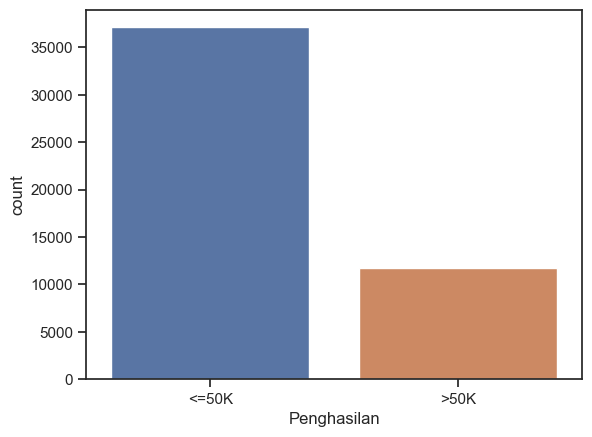

Counter({'<=50K': 37109, '>50K': 11681})
<50k =  76.05861856937896 % 50k =  23.94138143062103 %


In [16]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='Penghasilan')
plt.show()

D = Counter(df['Penghasilan'])
print(D)
print("<50k = ", D['<=50K']*100/(len(df['Penghasilan'])), '% 50k = ',D['>50K']*100/(len(df['Penghasilan'])) ,'%')

# <center><font color="blue">Klasifikasi dengan Model Regresi Logistik</font></center>

<p><img alt="" src="images/klas_regLogistik.png" /></p>

* Mencari garis lurus yang sedemikian sehingga kesalahan prediksinya sekecil mungkin (lihat gambar)
* Awalnya regresi logistik adalah metode klasifikasi binary: membedakan antara 2 kelas atau kategori.
* Masalah klasifikasi binary contohnya memprediksi seseorang terkena "kanker" atau "tidak kanker", kanker jinak/ganas, fraud atau bukan fraud (pada transaksi keuangan), negatif/positif dalam sentimen analisis, dsb.
* Regresi logistik adalah pengembangan dari model regresi liniear, namun di konversi ke masalah klasifikasi.

# <center><font color="blue">Regresi Logistik</font></center>

<p><img src="images/reg_to_log.png" alt="" width="591" height="298" /></p>

* http://www.saedsayad.com/logistic_regression.htm
* Makna fungsi logarithm?
* Konsekuensi dari rumus $\beta$ diatas?
* Asumsi?

# <center><font color="blue">Kaitan Regresi Logistik dan Neural Network/Deep Learning</font></center>

<p><img src="images/DL/logReg_NN_DL.png" alt="" width="262" height="263" /></p>

<p><img src="images/Fungsi_Sigmoid_.png" alt="" width="624" height="416" /></p>

# <center><font color="blue">Kelebihan dan Kekurangan Regresi Logistik</font></center>

<p><img alt="" src="images/LogReg_When2use.png" /></p>


In [17]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[10711   380]
 [ 2616   930]]
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     11091
        >50K       0.71      0.26      0.38      3546

    accuracy                           0.80     14637
   macro avg       0.76      0.61      0.63     14637
weighted avg       0.78      0.80      0.76     14637



In [18]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.80 (+/- 0.01), Waktu = 6.093 detik


RegLog    0.79381
dtype: float64

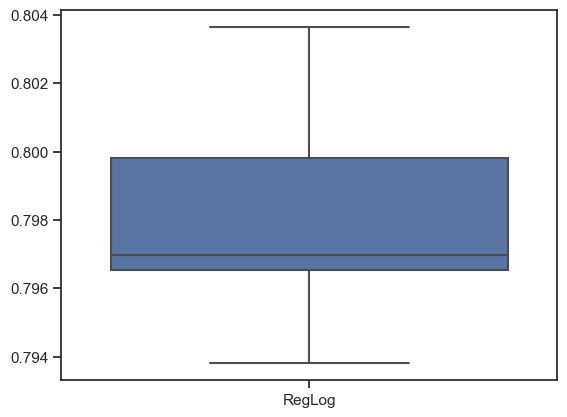

In [19]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'RegLog': scores_regLog})
p = sns.boxplot(data = df_)
df_.min()

# <center><font color="blue">Seberapa Baik Hasil Prediksi Ini?: Evaluation Metrics</font></center>

* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    
<center><img alt="" src="images/classification_metrics.png" style="height: 400px;"/></center>

# <center><font color="blue">Confusion Matrix</font></center>

<p><img alt="" src="images/confusion_matrix.png" /></p>

<ul>
	<li>sensitivity, recall, hit rate, or true positive rate (TPR)</li>
	<li>precision or positive predictive value (PPV)</li>
</ul>


<p><img alt="" src="images/ex-F1-Score.png" /></p>
* Yang mana kategori yang "positif"?

<p><img alt="" src="images/F-beta-Score.png" /></p>

* $0\leq F\leq 1$, 1 optimal value
* $0\leq\beta< \inf$
* beta < 1 lends more weight to precision, 
* beta > 1 favors recall 
* beta -> 0 considers only precision 
* beta -> inf only recall

# <center><font color="blue">Micro VS Macro Metric</font></center>

<p><img src="images/micro-vs-macro-f-score.png" alt="" width="790" height="244" /></p>

### <font color="green">Pada 2 kasus diatas:</font>
* sebaiknya Micro atau macro?
* Mana yang lebih penting Presisi atau Recall?

# <center><font color="blue">Sampel ke Populasi: Underfitting dan overfitting</font></center>

<img src="images/under-over_Fitting.jpg" alt="" width="564" height="568" />

<p><img src="images/meme-cartoon/meme overfitting.png" width="556" height="282" /></p>

# <center><font color="blue">Parsimoni: Simple is the Best</font></center>

<img src="images/sweet_spot.png" alt="" width="538" height="318" />

# <center><font color="blue">Cross Validation</font></center>

* Evaluasi yang kita lakukan belum cukup valid/objektif ... Mengapa?

<img alt="" src="images/6_Cross_validation.png" />

In [ ]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# namun sebaiknya hanya Train data (jika datanya cukup besar)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
kNN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
mulai = time.time()
scores_kNN = cross_val_score(kNN, df1, y1, cv=10)
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy k-NN: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_kNN.mean(), scores_kNN.std() * 2, waktu))

In [ ]:
# Visualisasi untuk mengevaluasi model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN})
p = sns.boxplot(data = df_)
min(scores_kNN)

# <center><font color="blue">Decision Tree Analogi</font></center>
<img alt="" src="images/meme-cartoon/6_DT_meme.png" />

# <center><font color="blue">Decision Tree (Pohon Keputusan)</font></center>

<img alt="" src="images/tree_plot.png" />

# <center><font color="blue">Decision Tree (Pohon Keputusan): Contoh Aplikasi</font></center>

<img alt="" src="images/6_DT.png" />

# <center><font color="blue">Teori Decision Tree : Entropy Formula</font></center>
<p><img alt="" src="images/Entropy.png" /></p>

# <center><font color="blue">Teori Decision Tree : Entropy Calculation</font></center>

<p><img alt="" src="images/Contoh_Entropy.png" style="width: 469px; height: 339px;" /></p>

# <center><font color="blue">Teori Decision Tree : Gain Formula</font></center>
<p><img alt="" src="images/Information_Gain.png" /></p>

# <center><font color="blue">Teori Decision Tree : Gain Calculation</font></center>

<p><img style="undefined: undefined;" src="images/Contoh_Gain.png" alt="" width="527" height="370" /></p>
<ul>
<li>Contoh Lain: <a href="http://www.saedsayad.com/decision_tree.htm" target="_blank" rel="nofollow noopener">http://www.saedsayad.com/decision_tree.htm</a></li>
<li>Ross Quinlan Website: <a href="https://www.rulequest.com/Personal/" target="_blank" rel="nofollow noopener">https://www.rulequest.com/Personal/</a></li>
</ul>

# <center><font color="blue">Teori Decision Tree : Information theory</font></center>

<p><img src="images/dec_Tree_Theory.png" alt="" width="594" height="334" /></p>
<ul>
<li>Alternative to Information Gain : Gini Index (CART): <a href="https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1" target="_blank" rel="nofollow noopener">https://medium.com/deep-math-machine-learning-ai/chapter-4-decision-trees-algorithms-b93975f7a1f1</a></li>
</ul>

# <center><font color="blue"> Pengaruh "ketinggian" tree terhadap bentuk model</font></center>

<p><img alt="" src="images/Dec_Tree_Asumsi_Depth.png" /></p>

# <center><font color="blue">Decision Tree (Pohon Keputusan): Kelebihan & Kekurangan</font></center>

<p><u><strong>When to use:</strong></u></p>

<ul>
	<li>Target : Binomial/nominal.</li>
	<li>Predictors (input): binomial, nominal, and-or interval (ratio).</li>
</ul>

<p><u><strong>Advantage:</strong></u></p>

<ul>
	<li>Fast and embarrassingly parallel.</li>
	<li>Tanpa iterasi, cocok untuk&nbsp;Big Data technology (e.g. Hadoop)[map-reduce friendly]</li>
	<li>Interpretability</li>
	<li>Robust terhadap outliers &amp; missing values</li>
</ul>

<p><u><strong>Disadvantage:</strong></u></p>

<ul>
	<li>Non probabilistic (ad hoc heuristic) +/-</li>
	<li>Target dengan banyak kelas</li>
	<li>Sensitive (instability)</li>
</ul>

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier() 
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(df1_train, y1_train)
y_DT1 = DT.predict(df1_test)

print(confusion_matrix(y1_test, y_DT1))
print(classification_report(y1_test, y_DT1))

In [ ]:
# Varible importance - Salah satu kelebihan Decision Tree
DT.feature_importances_

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(df1_train, y1_train)
p = tree.plot_tree(clf)

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, df1, y1, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
df_ = pd.DataFrame({'kNN': scores_kNN, 'RegLog': scores_regLog, 'NaiveBys':scores_nb, "DecTree":scores_dt})
p = sns.boxplot(data = df_)
df_.min()

# <center><font color="blue">Hyperparameter Optimization</font></center>

<ul>
<li>Misal akan dicontohkan dua algoritma (model) yang sudah kita bahas sebelumnya: k-NN dan SVM</li>
<li>Sebagai latihan silahkan untuk mencoba HO pada model yang lain.</li>
<li>Parameter tiap model di ML berbeda-beda dan nilai optimalnya berbeda pada setiap kasus.</li>
</ul>
<p><img src="images/rand_grid_search.png" alt="" width="811" height="406" /></p>

<img alt="" src="images/grid_search_workflow.png" />

In [60]:
# Hyperparameter optimization pada model kNN menggunakan gridCV
kCV = 10
metric = 'accuracy'
params = {}
params['kneighborsclassifier__n_neighbors'] = [1, 3, 5, 10, 15, 20, 25, 30]
params['kneighborsclassifier__weights'] = ('distance', 'uniform')

pipe = make_pipeline(neighbors.KNeighborsClassifier())
optKnn = GridSearchCV(pipe, params, cv=kCV, scoring=metric, verbose=1, n_jobs=-2) #
optKnn.fit(x_train, y_train)
print(optKnn.best_score_)
print(optKnn.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
0.7297726070861978
{'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'uniform'}


In [61]:
# Contoh Hyperparameter optimization pada model SVM menggunakan RandomizedSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Berikut ini contoh bagaimana mengetahui parameter yang dapat kita optimasi.
# Gunakan pengetahuan teori/analitik untuk mengoptimasi hanya parameter yang paling penting.
pipeSVM = make_pipeline(svm.SVC())
print(sorted(pipeSVM.get_params().keys()))

['memory', 'steps', 'svc', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose', 'verbose']


In [62]:
# Optimal parameter SVM dengan RandomizedSearch
# WARNING cell ini butuh waktu komputasi cukup lama
kCV = 10
paramsSVM = {}
paramsSVM['svc__C'] = [1, 10, 100, 1000] #sp.stats.uniform(scale=100)
paramsSVM['svc__gamma'] = [0.1, 0.001, 0.0001, 1, 10]
paramsSVM['svc__kernel'] = ['rbf', 'sigmoid', 'linear'] # , 'poly'
optSvm = RandomizedSearchCV(pipeSVM, paramsSVM, cv=kCV, scoring=metric, verbose=2, n_jobs=-2) # refit=True, pre_dispatch='2*n_jobs' pre_dispatch min 2* n_jobs
optSvm.fit(x_train, y_train)
print(optSvm.best_score_)
print(optSvm.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.7736118455843469
{'svc__kernel': 'linear', 'svc__gamma': 1, 'svc__C': 1000}


# Model Selection

<img alt="" src="images/model_selection.png" />

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   3 out of  10 | elapsed:    1.2s remaining:    2.9s


Accuracy kNN: 0.71 (+/- 0.17)
Accuracy SVM: 0.78 (+/- 0.20)


[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    7.0s finished


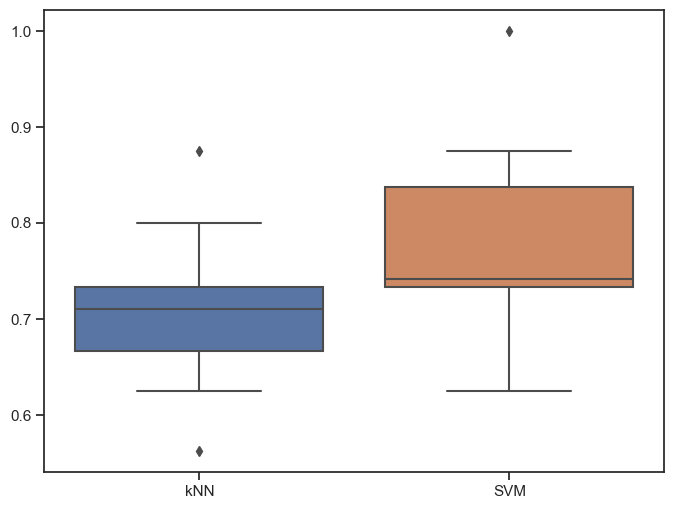

In [63]:
kCV = 10
# Menggunakan parameter optimal
kNN = neighbors.KNeighborsClassifier(n_neighbors= 20, weights= 'uniform')
svm_ = svm.SVC(kernel= 'linear', gamma= 10, C= 10)

# Melakukan Cross Validasi
models = ['kNN', 'SVM']
knn_score = cross_val_score(kNN, x_test, y_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
svm_score = cross_val_score(svm_, x_test, y_test, cv=kCV, scoring='accuracy', n_jobs=-2, verbose=1)
scores = [knn_score, svm_score]

data = {m:s for m,s in zip(models, scores)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
p = sns.boxplot(data=pd.DataFrame(data), ax=ax)

<center><h1><strong><font color="red">Latihan</font></strong></h1></center>

*  Lakukan Klasifikasi dan analisa/interpretasinya pada data berikut: http://archive.ics.uci.edu/dataset/34/diabetes